<img src="https://static.wincacademy.nl/logos/main-logo.png" height=200px style="height: 200px"/>

# Describing Data

In [1]:
!pip install matplotlib --user > /dev/null 2>&1
!pip install numpy --user > /dev/null 2>&1
!pip install pandas --user > /dev/null 2>&1

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Describing a dataset is surprisingly hard. Take this (simulated) data containing total income in 1980 for each of the 100.000 inhabitans of Fooville, for example.

In [2]:
income_samples = np.round(np.hstack([np.random.normal(2.5e4, 5e3, int(7e4)),
                                     np.random.normal(5.5e4, 4e3, int(2e4)),
                                     np.random.normal(9e4, 2e3, int(1e4))]),
                          2)
income_samples[income_samples < 0] = - income_samples[income_samples < 0]
np.random.shuffle(income_samples)

pd.DataFrame(income_samples, columns=['Income'])

,Income
0,26437.16
1,31168.02
2,91916.30
3,89361.98
4,54998.41
...,...
99995,35958.30
99996,26621.56
99997,25531.81
99998,26846.41


These are 100k datapoints. It's impossible to look at them all one by one. How are we going to interpret that large bag of unsorted data?

## Mean

One measure we should take a look at is the average, the **mean** of the data. The mean is calculated like so:

1. Sum up all the values
2. Divide them by the number of datapoints

Let's apply this to our data from the inhabitants of Fooville.

In [3]:
income_samples_mean = np.mean(income_samples)
print(f'The mean income in Fooville is {income_samples_mean:.2f}')

The mean income in Fooville is 37474.04


**1. What is the mean of this list of numbers? [1, 9, 19, 100]**

*TODO: Your answer here.*

In [4]:
dataset = [1, 9, 19, 100]
lengte = len(dataset) 
  
som = sum(dataset) 
gemiddelde = som / lengte 
  
print("Het gemiddelde is: " + str(gemiddelde)) 

Het gemiddelde is: 32.25


You, like me, might now be tempted to believe the data looks something like this.

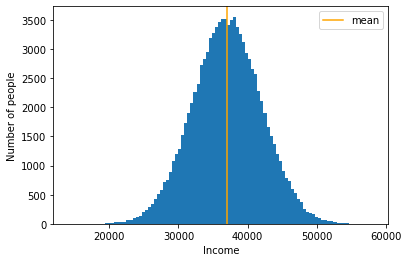

In [5]:
fig, ax = plt.subplots()
bin_vals, _, _ = ax.hist([np.random.normal(3.7e4, 5e3, int(10e4))], 100)
ax.axvline(3.7e4, label='mean', color='orange')
ax.set_xlabel('Income')
ax.set_ylabel('Number of people')
ax.legend();

**2. Explain how we should read this plot in your own words. Discuss specifically why the edge of the plot is not smooth. Hint: it's called a histogram.**

*TODO: Your answer here.*
Een histogram wordt gevormd door meerdere "bars" met een bepaalde range. In het geval van dit voorbeeld wordt de hoogte van de bar bepaald door het aantal mensen (elk persoon is een datapunt) met een bepaald inkomen. Daarbij is het niet smooth omdat een bar een bepaalde range heeft waar een datapunt wel of niet invalt.

**3. Why did we choose to draw the mean as a line, and not as a dot?**

*TODO: Your answer here.*
Als het als een punt wordt getekend kan het ook een datapunt voorstellen. Door een lijn te trekken is het duidelijk dat het niet om een datapunt gaat, maar om het gemiddelde.

**4. How realistic is it that this plot reflects the true situation, given the type of data we are looking at?**

*TODO: Your answer here.*
Niet, er is in de werkelijkheid sowieso een een grotere variateit zijn qua inkomen (beneden de 20000 en boven de 60000).

Let's take a look at the *real* histogram now.

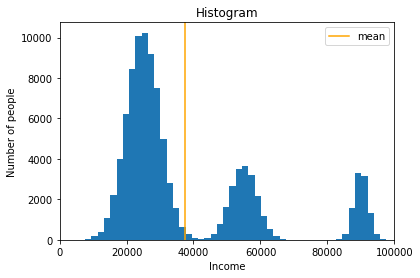

In [6]:
fig, ax = plt.subplots()
ax.set_title('Histogram')
ax.hist(income_samples, bins=50)
ax.axvline(income_samples_mean, color='orange', label='mean')
ax.set_xlabel('Income')
ax.set_ylabel('Number of people')
ax.set_xlim([0, 1e5])
ax.legend();

**5. Why is the mean not located at a peak in the histogram?**

*TODO: Your answer here.*
Omdat het gemiddelde wordt berekend over alle inkomens (in dit geval van 0 tot 100000). Omdat de meerderheid onder de 40000 verdient is het gemiddelde een meer in die richting, maar dat betekend niet dat het midden in een piek valt.

**6. How can the two plots look so different, even though their mean is the same?**

*TODO: Your answer here.*
In het eerste voorbeeld was het precies in het midden van de normaalvorm. In het tweede voorbeeld is het berekend over een veel groter aantal gegevens. Omdat de meeste mensen in het tweede voorbeeldtussen de 5000(?) en 40000 verdienen heeft deze groep een zwaarder aandeel in de berekening dat groep mensen die boven de 40000 verdienen.

**7. How much useful information does the mean give about the data here, in your opinion? Explain why.**

*TODO: Your answer here.*
Niet zoveel. Het gemiddelde geeft geen inzicht over het inkomen. Zelfs vrij weinig mensen verdienen echt zoveel als het gemiddelde.

## Median


An alternative measure that may be more useful is the **median**. The median is the middle value in a sorted list of all the data. Here's how to find the median:

1. Sort the data.
2. Find the middle number. If there are an even number of datapoints, take the mean of the middle two.

In [7]:
income_samples_median = np.median(income_samples)
print(f'The median income in Fooville is {income_samples_median:.2f}')

The median income in Fooville is 27813.33


Let's visualize where it is exactly on our histogram.

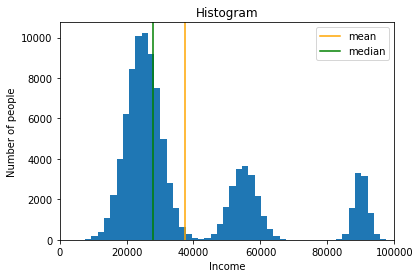

In [8]:
fig, ax = plt.subplots()
ax.set_title('Histogram')
ax.hist(income_samples, bins=50)
ax.axvline(income_samples_mean, color='orange', label='mean')
ax.axvline(income_samples_median, color='green', label='median')
ax.set_xlabel('Income')
ax.set_ylabel('Number of people')
ax.set_xlim([0, 1e5])
ax.legend();

**8. Is the median more informative about this dataset, in your opinion? Why? Consider the type of data that you're looking at.**

*TODO: Your answer here.*
Ja, in dit geval is duidelijk dat de helft van de mensen onder de 27813 verdienen en dat de tweede helft dus over een veel grotere range aan inkomen is verdeeld.

**9. How many people in Fooville have an income below the median? How many have an income above the median?**

*TODO: Your answer here.*
De helft verdient onder de mediaan en de andere helft verdient boven de mediaan.

**10. Which way does the median move if we mirror the data like we did in the bottom plot below? Which way does the mean move? Finally: which one moves more? Explain your answers.**

*TODO: Your answer here.*
Dan zal de mediaan ook worden gespiegeld (naar rechts verschuiven). Ook het gemiddelde zal naar rechts verschuiven. De mediaan zal het meest naar rechts verschuiven, omdat dan 50% veel meer verdient.

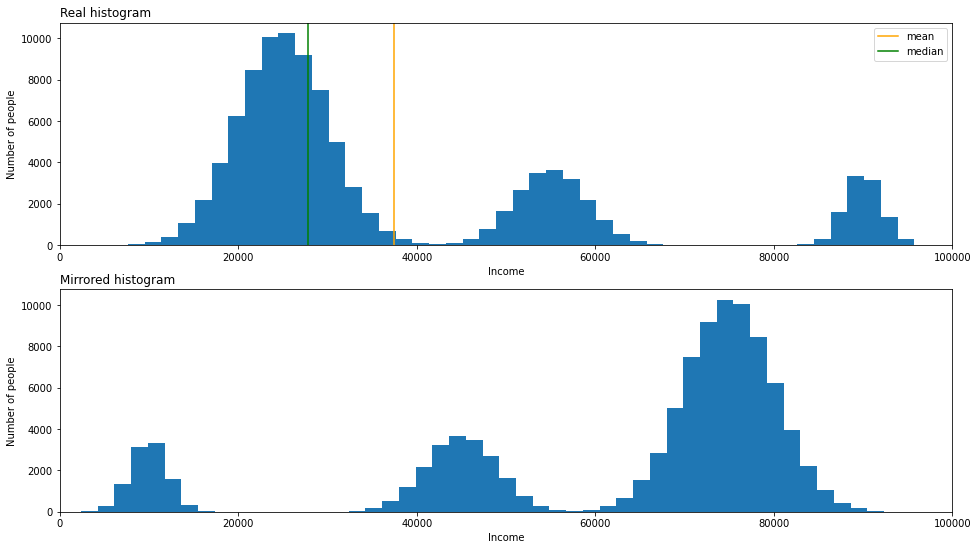

In [9]:
mirrored_income_samples = 0 - income_samples + 1e5

fig, axs = plt.subplots(2, 1, figsize=(16,9))
axs[0].set_title('Real histogram', loc='left')
axs[0].hist(income_samples, bins=50)
axs[0].axvline(income_samples_mean, color='orange', label='mean')
axs[0].axvline(income_samples_median, color='green', label='median')
axs[0].set_xlabel('Income')
axs[0].set_ylabel('Number of people')
axs[0].set_xlim([0, 1e5])
axs[0].legend();
axs[1].set_title('Mirrored histogram', loc='left')
axs[1].hist(mirrored_income_samples, bins=50)
axs[1].set_xlabel('Income')
axs[1].set_ylabel('Number of people')
axs[1].set_xlim([0, 1e5]);

## Mode and binning

A third number that gives some information about data is distributed is the **mode**. This is the value that occurs most frequently out of all the values.

Let's count how often each number occurs in our (non-mirrored) dataset and see which one occurs most often.

The mode of the income data from Fooville is 23363.67.
It occurs 4 times.


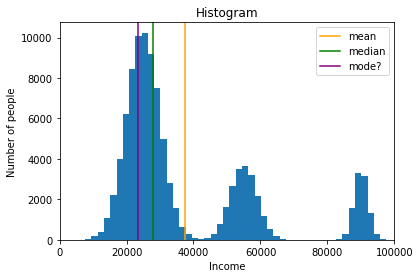

In [11]:
unique, frequency = np.unique(income_samples, return_counts = True)
income_samples_mode_freq = np.max(frequency)
income_samples_mode = unique[np.argmax(frequency)]
print(f'The mode of the income data from Fooville is {income_samples_mode:.2f}.\n'
      f'It occurs {income_samples_mode_freq} times.')

fig, ax = plt.subplots()
ax.set_title('Histogram')
ax.hist(income_samples, bins=50)
ax.axvline(income_samples_mean, color='orange', label='mean')
ax.axvline(income_samples_median, color='green', label='median')
ax.axvline(income_samples_mode, color='purple', label='mode?')
ax.set_xlabel('Income')
ax.set_ylabel('Number of people')
ax.set_xlim([0, 1e5])
ax.legend();

Hm! This does not match with what we learn from our histogram.

**11. What level of income would you have expected to be the mode?**

*TODO: Your answer here.*
Around 22000

**12. What is the problem that caused us to land on a strange value for the mode?**

*TODO: Your answer here.*
Elke bar heeft een bepaalde range, daarin kunnen dus inkomensverschillen zitten. Een bar met een range tussen 20000 en 25000 kan bijvoorbeeld een inkomens bevatten van 20000, 22500 en 25000. Als een van deze getallen meerdere keren worden genoemd, dan is dat de mode.


The problem that we have can be solved by *binning* the numbers in our data. Here's how that works:

1. Choose a number of *bins*. Think of these like buckets.
2. Divide the area between the minimum and maximum values of the data into smaller areas according to the number of bins.
3. Look at each datapoint and put it in the bin that it belongs to.
4. Count how many datapoints are in each bin.
5. Let each bin be represented by the middle value of the bin.

Let's do this and find the mode again.

The mode of the income data from Fooville is 25453.57.
It occurs 10243 times.


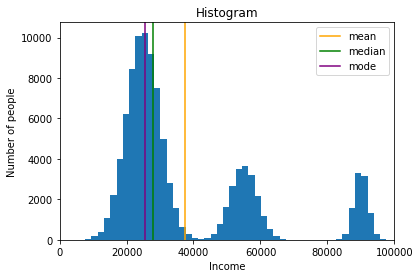

In [12]:
# PLAY AROUND WITH THIS VALUE
bins = 50
# DON'T MODIFY THE LINES BELOW

hist, bin_edges = np.histogram(income_samples, bins=bins)
income_samples_mode_freq = np.max(hist)
mode_bin_index = np.argmax(hist)
income_samples_mode = np.mean(bin_edges[mode_bin_index:mode_bin_index+2])
print(f'The mode of the income data from Fooville is {income_samples_mode:.2f}.\n'
      f'It occurs {income_samples_mode_freq} times.')
fig, ax = plt.subplots()
ax.set_title('Histogram')
ax.hist(income_samples, bins=bins)
ax.axvline(income_samples_mean, color='orange', label='mean')
ax.axvline(income_samples_median, color='green', label='median')
ax.axvline(income_samples_mode, color='purple', label='mode')
ax.set_xlabel('Income')
ax.set_ylabel('Number of people')
ax.set_xlim([0, 1e5])
ax.legend();

**13. How did binning solve the problem you described in your answer to question 12?**

*TODO: Your answer here.*
Nu is inderdaad de hoogste bar in de grafiek de mode.

**14. Would a bin count of 3 suffice? What about 100? What is the consideration in choosing a higher or lower bin count? And what is the downside of going too far in either direction?**

*TODO: Your answer here.*
3 Bins heeft waarschijnlijk weinig effect, er wordt namelijk nog steeds weinig onderscheid gemaakd net zoals binnen een bar. Hoe meer bins, hoe langer de procestijd van de query is, omdat er meer berekeningen moeten worden uitgevoerd.

## Quartiles and Boxplots

Finally, we will describe our data with a few extra measures:

- The min; the lowest value in the dataset.
- The max; the highest value in the dataset.
- The first quartile; the median of the lower half of the dataset. You find this value by sorting the data and selecting the middle of the lower half.
- The third quartile; the median of the upper half of the dataset. You find this value by sorting the data and selecting the middle of the upper half.

Together with the median, this is called the *five-number summary*. It is common to visualize these numbers in a type of plot that's called a *boxplot*. Here it is for the Fooville data.

The minimum is at 3901.5
The first quartile is at 23111.66
The third quartile is at 52309.02
The maximum is at 97606.17


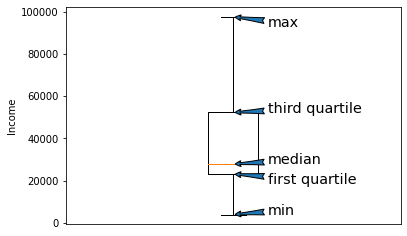

In [13]:
fig, ax = plt.subplots()
ax.boxplot(income_samples, whis=(0,100))
sorted_income_samples = np.sort(income_samples)
minimum = np.min(income_samples)
maximum = np.max(income_samples)
first_quartile = sorted_income_samples[int(sorted_income_samples.shape[0] / 4)]
third_quartile = sorted_income_samples[int(3 * sorted_income_samples.shape[0] / 4)]
ax.annotate('min', (1, minimum), fontsize='x-large', xytext=(35, 0), textcoords='offset points', arrowprops={'arrowstyle':'fancy'})
ax.annotate('max', (1, maximum), fontsize='x-large', xytext=(35, -10), textcoords='offset points', arrowprops={'arrowstyle':'fancy'})
ax.annotate('median', (1, income_samples_median), fontsize='x-large', xytext=(35, 0), textcoords='offset points', arrowprops={'arrowstyle':'fancy'})
ax.annotate('first quartile', (1, first_quartile), fontsize='x-large', xytext=(35, -10), textcoords='offset points', arrowprops={'arrowstyle':'fancy'})
ax.annotate('third quartile', (1, third_quartile), fontsize='x-large', xytext=(35, 0), textcoords='offset points', arrowprops={'arrowstyle':'fancy'})
ax.set_ylabel('Income')
ax.set_xticks([])

print(f'The minimum is at {minimum}')
print(f'The first quartile is at {first_quartile}')
print(f'The third quartile is at {third_quartile}')
print(f'The maximum is at {maximum}')

Here is the boxplot again without our annotations.

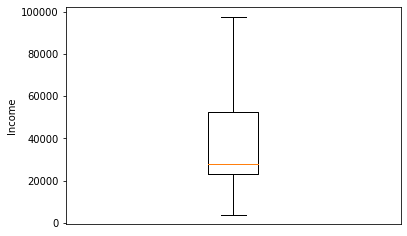

In [14]:
fig, ax = plt.subplots()
ax.boxplot(income_samples, whis=(0,100))
ax.set_ylabel('Income')
ax.set_xticks([]);

**15. How many inhabitants of Fooville have an income above the first quartile?**

*TODO: Your answer here.*
75%

**16. How many inhabitants of Fooville have an income between the first and third quartile?**

*TODO: Your answer here.*
50%

**17. Which of the following statements are correct? (type an `x` in those boxes)**

*TODO: Fill in the right boxes.*

   - [ ] "25% of all Fooville inhabitants have an income above 20.000"
   - [X] "50% of all Fooville inhabitants have an income between around 23.000 and around 52.000"
   - [X] "There are no Fooville inhabitants with an income above 98.000."

**18. Does the mean always fall between the first and third quartile? Explain your answer.**

*TODO: Your answer here.*
Nee. Als er een heel afwijkend getal tussen zit kan die het gemiddelde zo beïnvloeden dat het gemiddelde buiten het eerste en derde kwartiel valt.

**19. Do you think a boxplot is a nice summary of the Fooville income data? Why? How does it compare to the histogram?**

*TODO: Your answer here.*
Ja, het geeft de spreiding heel goed weer.

That's it for this lesson! You now have an intuitive understanding of:

- The mean
- The median
- The mode
- Binning
- Histograms
- The minimum and maximum
- The first and third quartile
- Boxplots

Congratulations! That's a lot of material to work through.